In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sohanmeshram1","key":"b7ef94eb696989ad087108129c4aa570"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d tongpython/cat-and-dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 90% 197M/218M [00:01<00:00, 177MB/s]
100% 218M/218M [00:01<00:00, 148MB/s]


In [4]:
!unzip cat-and-dog.zip -d cat-and-dog


Streaming output truncated to the last 5000 lines.
  inflating: cat-and-dog/training_set/training_set/cats/cat.3704.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3705.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3706.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3707.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3708.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3709.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.371.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3710.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3711.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3712.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3713.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3714.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3715.jpg  
  inflating: cat-and-dog/tr

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import cv2

In [6]:
def count_images(directory):
  image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')
  image_count = 0
  for filename in os.listdir(directory):
    if filename.lower().endswith(image_extensions):
      image_count += 1
  return image_count
base_dir = '/content/cat-and-dog/training_set/training_set'
for entry in os.scandir(base_dir):
  if entry.is_dir():
    image_count = count_images(entry.path)
    print(f"{entry.name}: {image_count} images")

cats: 4000 images
dogs: 4005 images


In [7]:
def count_images(directory):
  image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')
  image_count = 0
  for filename in os.listdir(directory):
    if filename.lower().endswith(image_extensions):
      image_count += 1
  return image_count
base_dir = '/content/cat-and-dog/test_set/test_set'
for entry in os.scandir(base_dir):
  if entry.is_dir():
    image_count = count_images(entry.path)
    print(f"{entry.name}: {image_count} images")

cats: 1011 images
dogs: 1012 images


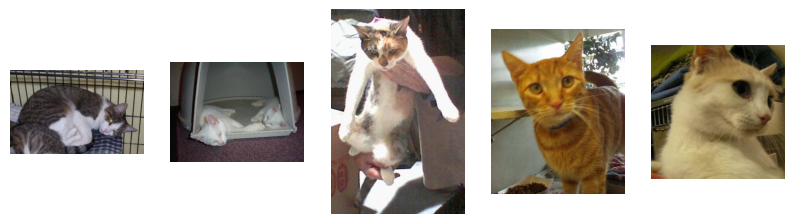

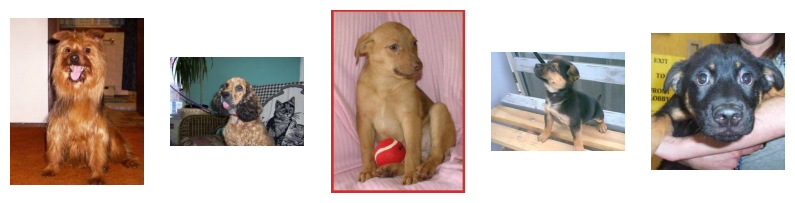

In [8]:
cats_dir = '/content/cat-and-dog/training_set/training_set/cats'
dogs_dir = '/content/cat-and-dog/training_set/training_set/dogs'

def display_images(directory, num_images):
  images = []
  for filename in os.listdir(directory)[:num_images]:
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
      images.append(os.path.join(directory, filename))

  plt.figure(figsize=(10, 5))
  for i, image_path in enumerate(images):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.subplot(1, len(images), i + 1)
    plt.imshow(img)
    plt.axis('off')
  plt.show()

display_images(cats_dir, 5)

display_images(dogs_dir, 5)

# GoogleNet


In [9]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [10]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
for layer in base_model.layers:
    layer.trainable = False

In [12]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=x)

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 299, 299, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 149, 149, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 149, 149, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 149, 149, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 147, 147, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 147, 147, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 147, 147, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 147, 147, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 147, 147, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 147, 147, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 73, 73, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 73, 73, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 73, 73, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 71, 71, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 71, 71, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 55,357,729 (211.17 MB)

 Trainable params: 33,554,945 (128.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    '/content/cat-and-dog/training_set/training_set',
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/cat-and-dog/training_set/training_set',
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/cat-and-dog/test_set/test_set',
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 2023 images belonging to 2 classes.


In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

In [18]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


201/201 ━━━━━━━━━━━━━━━━━━━━ 81s 258ms/step - accuracy: 0.9491 - loss: 2.1617 - val_accuracy: 0.9931 - val_loss: 0.3766
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 33s 162ms/step - accuracy: 0.9878 - loss: 0.3444 - val_accuracy: 0.9875 - val_loss: 0.3159
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 34s 163ms/step - accuracy: 0.9950 - loss: 0.1023 - val_accuracy: 0.9913 - val_loss: 0.3484
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 45s 187ms/step - accuracy: 0.9944 - loss: 0.0712 - val_accuracy: 0.9900 - val_loss: 0.2680
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 37s 178ms/step - accuracy: 0.9943 - loss: 0.0643 - val_accuracy: 0.9894 - val_loss: 0.3228
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 40s 173ms/step - accuracy: 0.9981 - loss: 0.0259 - val_accuracy: 0.9819 - val_loss: 0.5067
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 40s 170ms/step - accuracy: 0.9948 - loss: 0.1262 - val_accuracy: 0.9894 - val_loss: 0.6164
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


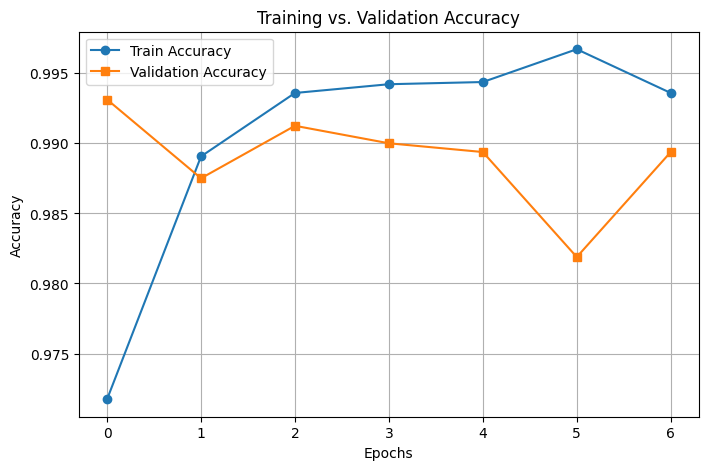

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.9919 - loss: 0.2747
Test accuracy: 0.9941


64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step


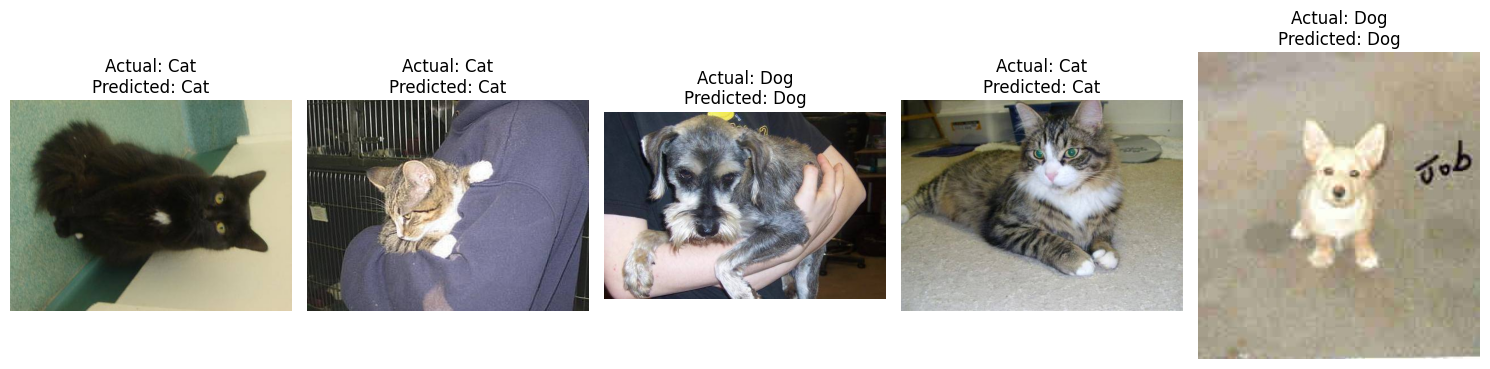

In [23]:
import matplotlib.pyplot as plt
import numpy as np
predictions = model.predict(test_generator)
predicted_classes = np.round(predictions).astype(int).flatten()
true_classes = test_generator.classes
filenames = test_generator.filenames
num_images_to_show = 5
random_indices = np.random.choice(len(filenames), size=num_images_to_show, replace=False)
plt.figure(figsize=(15, 10))
for i, index in enumerate(random_indices):
    image_path = os.path.join('/content/cat-and-dog/test_set/test_set',filenames[index])
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(img)
    plt.title(f"Actual: {'Cat' if true_classes[index] == 0 else 'Dog'}\nPredicted: {'Cat' if predicted_classes[index] == 0 else 'Dog'}")
    plt.axis('off')

plt.tight_layout()
plt.show()